In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data analysis 

In [114]:
solar_data=pd.read_csv(r"C:\Users\ABC\Documents\Dhrumil\ML & AI\SolarPrediction.csv")
solar_data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [115]:
solar_data.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [116]:
solar_data.shape

(32686, 11)

In [117]:
solar_data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [118]:
sd=solar_data.drop(['UNIXTime'],axis=1)
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [119]:
sd.dtypes


Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [120]:
#Converting the data type of the sunrise time and sunset time
sd['TimeSunRise']=pd.to_datetime(sd['TimeSunRise'],format='%H:%M:%S')
sd['TimeSunSet']=pd.to_datetime(sd['TimeSunSet'],format='%H:%M:%S')


In [121]:
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00


In [122]:
sd['Exposure time']=sd['TimeSunSet']-sd['TimeSunRise']
sd['Exposure time']=sd['Exposure time']/np.timedelta64(1,'m') #Exposure time in minutes 

In [123]:
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Exposure time
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0


In [124]:
#Cleaning the time sunrise and time sunset column
solar=sd.drop(['TimeSunRise','TimeSunSet'],axis=1)
solar.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,720.0
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,720.0
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,720.0
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,720.0
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,720.0


In [125]:
solar['Date']=pd.to_datetime(solar['Data']+''+solar['Time'])
solar.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [126]:
solar.dtypes

Data                              object
Time                              object
Radiation                        float64
Temperature                        int64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
Exposure time                    float64
Date                      datetime64[ns]
dtype: object

In [127]:
sr=solar.drop(['Data','Time'],axis=1)
sr.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
0,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
1,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
3,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
4,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [128]:
sr.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,690.550542
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,29.931225
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,656.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,662.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,684.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,715.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,751.000000


In [129]:
#Outliers prediction
sr.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Exposure time             0
Date                      0
dtype: int64

<AxesSubplot:xlabel='Radiation'>

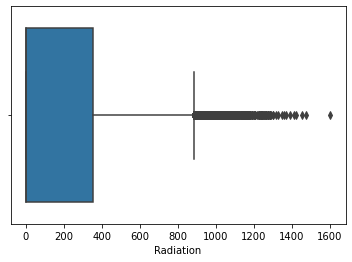

In [130]:
sns.boxplot(x='Radiation',data=sr)

In [131]:
print(sr['Radiation'].quantile(0.95))

907.275


In [132]:
Q1=sr['Radiation'].quantile(0.25)
Q3=sr['Radiation'].quantile(0.75)

In [133]:
IQR=Q3-Q1
IQR

353.005

In [134]:
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR


In [135]:
# To know the counts of the outlier values 
outlier=[]
for x in sr['Radiation']:
    if (x>upper_lim) or (x<low_lim):
        outlier.append(x)
print(len(outlier))

1965


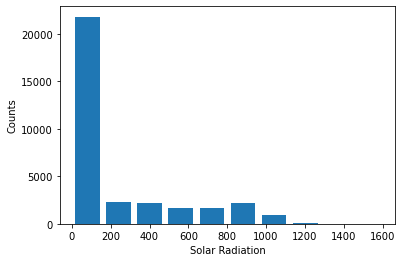

In [140]:
plt.hist(sr.Radiation,bins=10,rwidth=0.8)
plt.xlabel('Solar Radiation')
plt.ylabel('Counts')
plt.show()